In [1]:
# import modules
%pylab inline

import h5py

import pandas as pd
from scipy.interpolate import interp1d
from astropy import cosmology, units
import numpy as np
#import deepdish as dd
import matplotlib.pyplot as plt

import bilby as bb
from bilby.core.prior import LogUniform, PriorDict, Uniform
from bilby.core.result import read_in_result
from bilby.hyper.model import Model
import gwpopulation as gwpop
from gwpopulation.models.redshift import PowerLawRedshift
from gwpopulation.models.mass import SinglePeakSmoothedMassDistribution
from gwpopulation.models.mass import BaseSmoothedMassDistribution

from IPython.display import display as print
%config InlineBackend.figure_format='retina'
plt.rcParams["font.family"] = "STIXGeneral"
plt.rcParams["mathtext.default"] = "it"

# from matplotlib import style
# style.use('dark_background')

Populating the interactive namespace from numpy and matplotlib


Download the data release

In [25]:
#!wget https://zenodo.org/record/5655785/files/GWTC-3-population-data.tar.gz -P ..
#!tar -xvzf ../GWTC-3-population-data.tar.gz

--2022-02-10 15:51:32--  https://zenodo.org/record/5655785/files/GWTC-3-population-data.tar.gz
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10070439649 (9.4G) [application/octet-stream]
Saving to: ‘../GWTC-3-population-data.tar.gz’

              GWTC-   0%[                    ]  68.79M  1.12MB/s    eta 47m 51s^C


The following reads in hyperposterior samples. It was my first goal to sample from the posterior distribution so I need to investigate if what I have here are already those 
samples.

PP_result.sampler returns dynesty.


In [2]:
PP_path = '../GWTC-3-population-data/analyses/PowerLawPeak/o1o2o3_mass_c_iid_mag_iid_tilt_powerlaw_redshift_result.json'
PP_result = read_in_result(PP_path)
#GS_path = 'GWTC-3-population-data/analyses/GaussianSpin/posteriors_gaussian_spin_samples_FAR_1_in_1_w190814.json'
#GS_result = read_in_result(GS_path)

#dir(PP_result)
# PP_result.meta_data

In [3]:
print("run label: ", PP_result.label)
print("log10 BF: ", PP_result.log_10_bayes_factor) # note that this will not always be the same BF that is quoted in the text because some corrections are necessary to compare these between models
print("\n", "hyper-priors:")
PP_result.priors
# dir(PP_result.priors)

# copy a pandas dataframe of the posterior
PP_hyperposterior_samples = PP_result.posterior.copy() # making a copy is best practice here so you don't accidentally modify things in-place
PP_hyperposterior_samples

'run label: '

'o1o2o3_mass_c_iid_mag_iid_tilt_powerlaw_redshift'

'log10 BF: '

38.46431085780439

'\n'

'hyper-priors:'

,alpha,beta,mmax,mmin,lam,mpp,sigpp,delta_m,mu_chi,sigma_chi,...,lamb,amax,log_likelihood,log_prior,selection,pdet_n_effective,surveyed_hypervolume,log_10_rate,rate,min_event_n_effective
0,2.116671,0.645405,84.257180,3.858558,0.075468,30.270897,8.346910,3.511792,0.262951,0.033104,...,-1.007767,1.0,86.740514,-20.167742,0.006983,6630.971573,300.455132,1.475926,29.917560,205.407820
1,2.357356,0.504086,78.325899,5.301450,0.123904,38.688342,4.317169,2.576325,0.247116,0.028849,...,-2.460752,1.0,88.476899,-20.167742,0.016273,3772.629171,107.519753,1.521225,33.206611,84.680631
2,2.763145,-1.038759,92.335648,4.512187,0.136947,26.322204,9.283129,3.411572,0.201743,0.024835,...,4.922529,1.0,89.160301,-20.167742,0.000089,4852.535111,69321.160923,1.075940,11.910773,107.429424
3,2.975530,1.204292,81.253295,5.193624,0.095203,40.661528,6.232922,4.752846,0.223713,0.024432,...,-1.466976,1.0,89.577067,-20.167742,0.010964,4340.422763,213.598090,1.485615,30.592485,89.268950
4,2.336330,0.888358,83.282458,3.218458,0.150673,27.806907,6.098497,5.846578,0.240640,0.019683,...,1.572624,1.0,89.923126,-20.167742,0.001794,5813.075241,2629.581289,1.171681,14.848441,80.848769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11464,3.417291,0.301697,85.168951,4.798439,0.035291,33.889739,2.350728,5.505413,0.230583,0.020566,...,3.264948,1.0,108.115543,-20.167742,0.000339,2972.807715,13097.278496,1.214318,16.380142,71.881363
11465,3.328885,1.642387,79.491399,4.931802,0.034236,34.720684,2.136944,5.327197,0.254585,0.032604,...,2.109967,1.0,108.120336,-20.167742,0.000872,3152.917529,4322.664396,1.369043,23.390707,72.814645
11466,3.328885,1.642387,79.491399,4.931802,0.034236,34.720684,2.136944,5.327197,0.254585,0.032604,...,2.109967,1.0,108.120336,-20.167742,0.000872,3152.917529,4322.664396,1.288162,19.416100,72.814645
11467,3.548725,0.760204,83.140164,4.815572,0.019037,34.467261,1.866748,5.453627,0.235676,0.024758,...,3.431551,1.0,108.206956,-20.167742,0.000256,3214.364467,15429.210409,1.259669,18.183135,76.580270


Let's see what PyCBC needs in order to produce an SNR.

(array([ 408.,  555.,  760.,  880., 1057., 1302., 1465., 1547., 1655.,
        1840.]),
 array([0.0014337 , 0.10128307, 0.20113245, 0.30098183, 0.4008312 ,
        0.50068058, 0.60052996, 0.70037933, 0.80022871, 0.90007809,
        0.99992746]),
 <BarContainer object of 10 artists>)

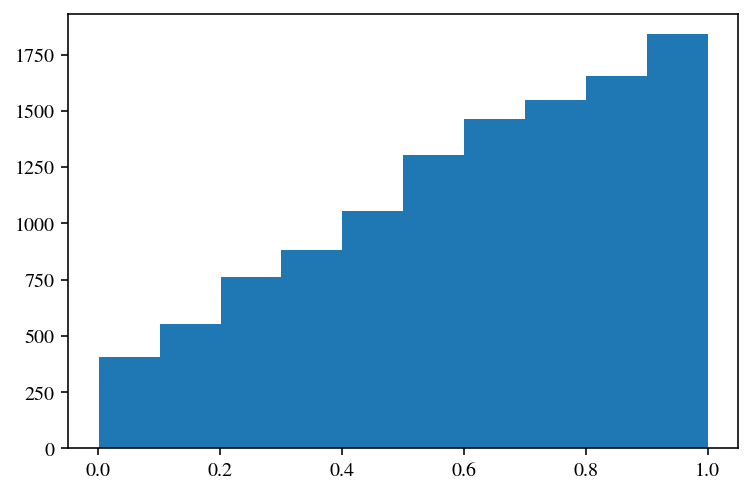

In [5]:
plt.hist(PP_hyperposterior_samples['xi_spin'])

In [6]:
#!wget https://git.ligo.org/publications/O3/o3b-astro-dist/-/blob/master/analyses/shanika/macro_data/PowerLawPeakObsOneTwoThree.json -P ..

# this wget didn't download the json properly last time, instead it only took the parameters on that site, missing all the other info

## Draw Samples

In `GWPopulation` there exist Mass, Redshift and Spin models. https://colmtalbot.github.io/gwpopulation/_autosummary/gwpopulation.models.mass.html

I want to sample from each of these in order to get the posterior parameters I require for generating SNRs.

Shanika Galaudage uses an if statement to determine what model is being used given what hyperparameters exist. https://git.ligo.org/shanika.galaudage/o3a-population/-/blob/master/scripts/generate_ppd_samples.py 

#### Mass Models
https://github.com/ColmTalbot/gwpopulation/blob/master/gwpopulation/models/mass.py 

The mass model from which the hyperposterior samples are drawn from is SinglePeakSmoothedMassDistribution. It is important to also then use this model from GWPopulations to ensure consistency. 
* Info at https://colmtalbot.github.io/gwpopulation/_autosummary/gwpopulation.models.mass.SinglePeakSmoothedMassDistribution.html#gwpopulation.models.mass.SinglePeakSmoothedMassDistribution
* This is a class so is set up slightly differently to what I did originally, I need to have a look at how it receives the parameters

#### Spin Models
There are 2 spin models investigated in the populations paper (https://arxiv.org/pdf/2111.03634.pdf):
1. First, we use the Default spin model to directly measure the distribution of BBH component spin magnitudes and tilts. We model component spin magnitudes as being independently and identically drawn from a Beta distribution
    * not clear yet on the corresponding model in GWPopulation
2. Gaussian spin model : Our second approach is to instead seek to measure the distribution of effective spin parameters χeff and χp. In this case, we phenomenologically model the joint χeff –χp distribution as a bivariate Gaussian. 
    * spin.gaussian_chi_eff, A Gaussian in chi effective distribution, no precession spin in this model
    * spin.gaussian_chi_p, A Gaussian distribution in precessing effective spin (chi p), no chi_eff in this model
    * there is a class GaussianChiEffChiP, A covariant Gaussian in effective aligned and precessing spins.
        * start with the simpler gaussian_chi_eff and add complexity later

The meta_data gives:

'models': ['SinglePeakSmoothedMassDistribution',
  'iid_spin_magnitude',
  'iid_spin_orientation',
  'gwpopulation.models.redshift.PowerLawRedshift']
  
In the hyperparameters there is alpha_chi_1 and alpha_chi_2 suggesting that iid_spin_magnitude model has two independent beta distributions so corresponds to independent_spin_magnitude_beta .
* alpha_chi_1 etc are listed in the priors, not in the hyperposterior samples
* the hyperposterior samples only have mu_chi and sigma_chi
    * I am therefore choosing the model to be gaussian_chi_eff

There is only xi_spin and sigma spin so the orientation model is iid_spin_orientation_gaussian_isotropic .

Solution:

There is a conversion tool within `GWPopulation` to convert to the necessary parameters for the beta spin distribution.

#### Redshift Models
Population paper parameterizes the merger rate with comoving volume as a power law $R(z) \propto (1+z)^k$

In [7]:
# select a random sample from the PowerlawPeak
# these hyperposterior samples include vlaues for all the models used
PP_params = PP_hyperposterior_samples.iloc[random.randint(0, len(PP_hyperposterior_samples))].to_dict()

# # read in spin hyperposterior samples and select one of the values to feed to the spin model
# GS_path = 'GWTC-3-population-data/analyses/GaussianSpin/posteriors_gaussian_spin_samples_FAR_1_in_1_w190814.json'
# GS_samples = pd.read_json(GS_path)

# GS_params = GS_samples.iloc[random.randint(0, len(GS_samples))].to_dict()

# use the conversion tool pointed out by Colm Talbot
PP_params = gwpop.conversions.convert_to_beta_parameters(PP_params, remove=False)[0]


# add in z_max
PP_params['z_max'] = 2.3

print(PP_params)

{'alpha': 3.639886447596873,
 'beta': 2.632661589771577,
 'mmax': 89.88673020544707,
 'mmin': 5.443851130666042,
 'lam': 0.05731979536148578,
 'mpp': 28.785863527000362,
 'sigpp': 7.8820781740291475,
 'delta_m': 5.305434248964055,
 'mu_chi': 0.27888503419354593,
 'sigma_chi': 0.03048771886630059,
 'xi_spin': 0.7998730668942692,
 'sigma_spin': 1.5206169536271539,
 'lamb': 2.4403785532729785,
 'amax': 1.0,
 'log_likelihood': 102.19841363157047,
 'log_prior': -20.16774239936692,
 'selection': 0.0007576218063086554,
 'pdet_n_effective': 4687.691476854295,
 'surveyed_hypervolume': 5904.640469449005,
 'log_10_rate': 1.1605505700955148,
 'rate': 14.472733666139343,
 'min_event_n_effective': 72.89550749891018,
 'alpha_chi': 1.560742903924395,
 'beta_chi': 4.0356237438507625,
 'z_max': 2.3}

In [8]:
# choose a model from within GWPopulations, this should really be the same underlying model as that at model_path, CHANGE
mass_model = Model([gwpop.models.mass.SinglePeakSmoothedMassDistribution(mmin = PP_params['mmin'], 
                                                                         mmax = PP_params['mmax'])])
spin_mag_model = Model([gwpop.models.spin.iid_spin_magnitude_beta])
spin_ori_model = Model([gwpop.models.spin.iid_spin_orientation_gaussian_isotropic])
z_model = Model([gwpop.models.redshift.PowerLawRedshift(z_max = PP_params['z_max'])])

spin_mag_model.models

[<function gwpopulation.models.spin.iid_spin_magnitude_beta(dataset, amax=1, alpha_chi=1, beta_chi=1)>]

So the model takes a dataset(mass, spins etc) and the hyperparameters(alpha, beta...) as model.parameters and can output a probability.

It looks like there are some differences in the naming of the hyperparameters in the dict. I will rename those that I think are the same. 
**BE WARNED** however that I am ASSUMING these to be the same parameter. I.e. the `model.prob` wants the key mu_chi_eff, which I here assume to be mu_chi since the PowerLawPeakObsOneTwoThree.json doesn't include a spin precession posterior.

I don't expect this to be an issue at this stage as I am fairly arbitrarily using the PowerLawPeakObsOneTwoThree.json median values as the `model.parameters`, so even this choice is a median rather than a mu.

For a list of standard parameters used in PESummary: https://lscsoft.docs.ligo.org/pesummary/unstable_docs/gw/parameters.html.

update: no longer an issue since finding the conversion tool

# Next: 
* Switch to using a random hyperposterior sample
* Choose some random chi_eff and chi_p
    * may be reasonable to take chi_eff as U(-1,1) as in Roulet 2020
    * chi_p will likely be uniform also, check though
* Create probabilities as was done with mass
    * This may require additional hyperparameters outwith PowerLawPeakObsOneTwoThree
* produce cdf, normalise and sample from it for spins
* do the same for redshift

Issue:

* Previously the bilby.hyper.model was taking a function from within GWPopulation which worked fine. 
* Now SinglePeakSmoothedMassDistribution is a class, within this class it has self.mmin etc defined. 
* I am defining the input Model.parameters also which includes mmin etc.
* So the Model.prob gets multiple values for mmin etc
* I need to feed Model.prob only one value for each of these arguements

Options to try:
* Don't define Model.parameters, instead set these when initialising the class
* Delete the duplicate parameters after ensuring they are the same

Solution was just to set the mmin and mmax when initialising the class to be the same as those in PP_params.

In [9]:
# the model has a few attributes found with dir(model), these are: models', 'parameters', 'prob'
# set the model.parameters to be the medians of the model_path as defined above
#PP_params.pop('mmin')
mass_model.parameters = spin_mag_model.parameters = spin_ori_model.parameters = z_model.parameters = PP_params


# the model is defined over ranges of these parameters, let's fill the parameter space of mass_vals and mass_ratio
mass_1 = np.linspace(PP_params['mmin'],PP_params['mmax'],1000)
mass_ratio = np.ones(1000)
#chi_eff = np.linspace(-1,1,1000)
a_1 = np.linspace(0,1,1000)
a_2 = np.linspace(0,1,1000)
cos_tilt_1 = np.linspace(-1,1,1000)
cos_tilt_2 = np.ones(1000)
redshift = np.linspace(0,2.3,1000)

# different models take different keys, for instance mass.double_power_law_peak_primary_mass takes mass, mass.power_law_primary_mass_ratio takes a dataset of mass_1 and mass_ratio
input_df = pd.DataFrame(mass_1, columns = ['mass_1'])
input_df = input_df.assign(mass_ratio = mass_ratio,
                          a_1 = a_1,
                          a_2 = a_2,
                          cos_tilt_1 = cos_tilt_1,
                          cos_tilt_2 = cos_tilt_2,
                          redshift = redshift)

# we can now find the probability of each of these sets of parameters occurring
mass_probs = mass_model.prob(input_df)
spin_mag_probs = spin_mag_model.prob(input_df)
spin_ori_probs = spin_ori_model.prob(input_df)
z_probs = z_model.prob(input_df)

/data/wiay/johnny/phd1/phd1/lib/python3.7/site-packages/gwpopulation/models/mass.py:554: RuntimeWarning: overflow encountered in exp
  window[smoothing_region] = 1 / (xp.exp(exponent) + 1)
/data/wiay/johnny/phd1/phd1/lib/python3.7/site-packages/gwpopulation/models/mass.py:552: RuntimeWarning: divide by zero encountered in true_divide
  delta_m / shifted_mass + delta_m / (shifted_mass - delta_m)
/data/wiay/johnny/phd1/phd1/lib/python3.7/site-packages/gwpopulation/utils.py:76: RuntimeWarning: divide by zero encountered in true_divide
  norm = (1 + alpha) / (high ** (1 + alpha) - low ** (1 + alpha))
/data/wiay/johnny/phd1/phd1/lib/python3.7/site-packages/gwpopulation/utils.py:79: RuntimeWarning: invalid value encountered in multiply
  prob *= (xx <= high) & (xx >= low)
/data/wiay/johnny/phd1/phd1/lib/python3.7/site-packages/gwpopulation/models/mass.py:503: RuntimeWarning: invalid value encountered in multiply
  self.m1s_grid * self.qs_grid, mmin=mmin, mmax=self.m1s_grid, delta_m=delta_m
/

This model is a class and may take the parameters slightly differently as inputs, https://colmtalbot.github.io/gwpopulation/_modules/gwpopulation/models/mass.html#SinglePeakSmoothedMassDistribution

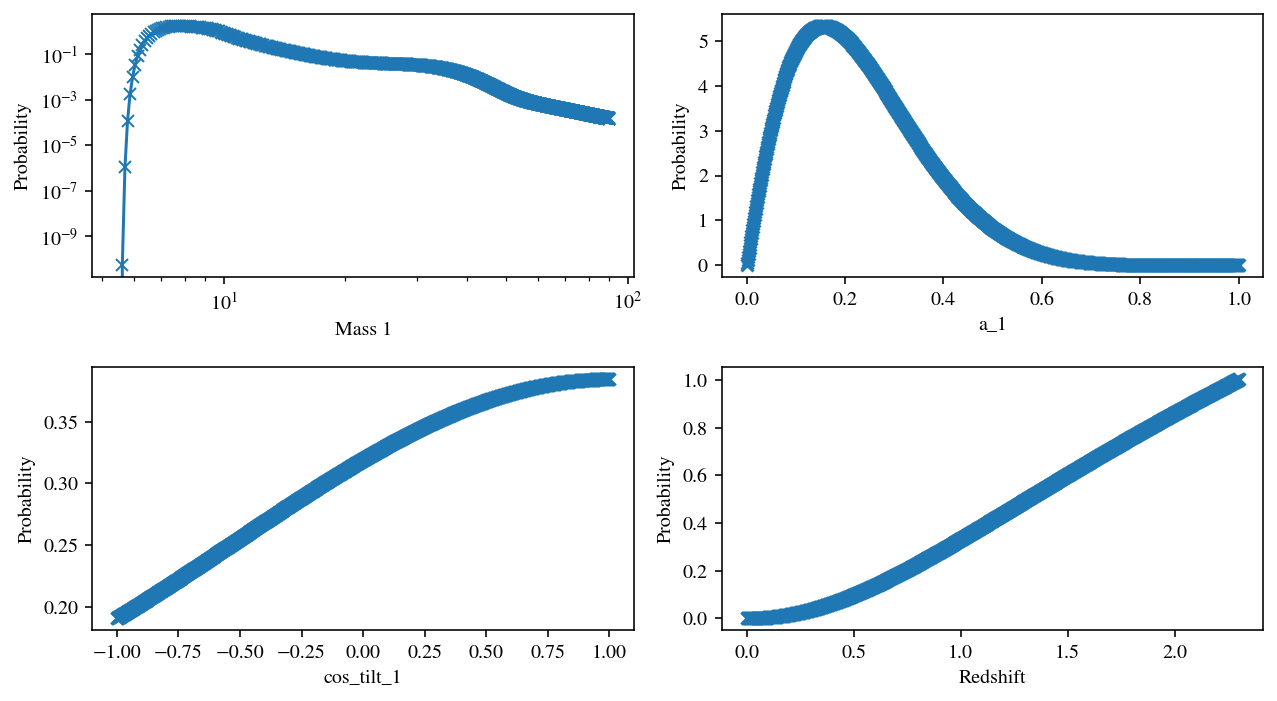

In [10]:
# lets have a look at this distribution

fig = plt.figure(figsize=(9,5))

fig.add_subplot(2,2,1, xlabel='Mass 1', ylabel='Probability')
plt.loglog(mass_1, mass_probs, marker='x')

fig.add_subplot(2,2,2, xlabel='a_1', ylabel='Probability')
plt.scatter(a_1, spin_mag_probs, marker='x')

fig.add_subplot(2,2,3, xlabel='cos_tilt_1', ylabel='Probability')
plt.scatter(cos_tilt_1, spin_ori_probs, marker='x')

fig.add_subplot(2,2,4, xlabel='Redshift', ylabel='Probability')
plt.scatter(redshift, z_probs, marker='x')

fig.tight_layout()
plt.show()

# it looks like a powerlaw with a peak
# peak of chi_eff is at the location of mu_chi_eff

In [11]:
#print(chi_eff_vals)

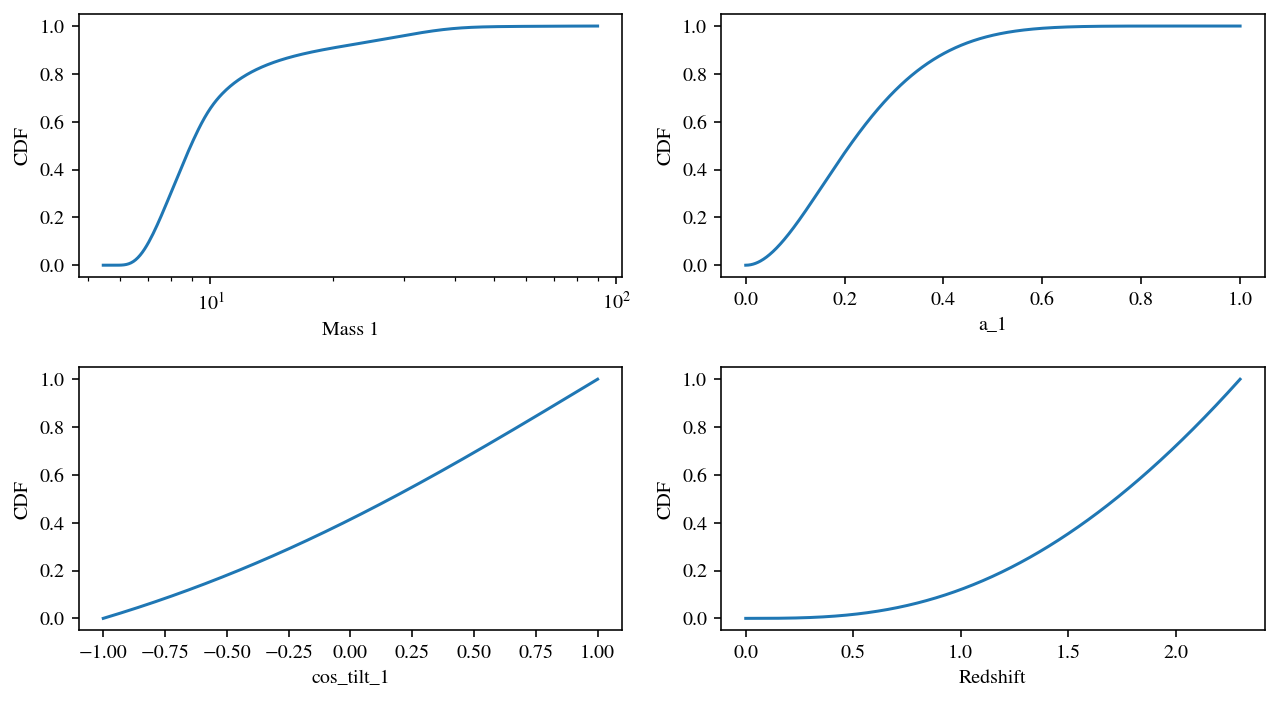

In [12]:
# now we can generate a cdf for the distribution and normalise it
#mass_probs = mass_probs[1:]

PP_mass_cdf = np.cumsum(mass_probs).to_numpy()
PP_mass_cdf = (PP_mass_cdf - PP_mass_cdf[0])
PP_mass_cdf /= PP_mass_cdf[-1]

PP_mag_cdf = np.cumsum(spin_mag_probs).to_numpy()
PP_mag_cdf = (PP_mag_cdf - PP_mag_cdf[0])
PP_mag_cdf /= PP_mag_cdf[-1]

PP_ori_cdf = np.cumsum(spin_ori_probs).to_numpy()
PP_ori_cdf = (PP_ori_cdf - PP_ori_cdf[0])
PP_ori_cdf /= PP_ori_cdf[-1]

PP_z_cdf = np.cumsum(z_probs).to_numpy()
PP_z_cdf = (PP_z_cdf - PP_z_cdf[0])
PP_z_cdf /= PP_z_cdf[-1]

fig = plt.figure(figsize=(9,5))

fig.add_subplot(2,2,1, xlabel='Mass 1', ylabel='CDF')
plt.semilogx(mass_1, PP_mass_cdf)

fig.add_subplot(2,2,2, xlabel='a_1', ylabel='CDF')
plt.plot(a_1, PP_mag_cdf)

fig.add_subplot(2,2,3, xlabel='cos_tilt_1', ylabel='CDF')
plt.plot(cos_tilt_1, PP_ori_cdf)

fig.add_subplot(2,2,4, xlabel='Redshift', ylabel='CDF')
plt.plot(redshift, PP_z_cdf)

fig.tight_layout()
plt.show()

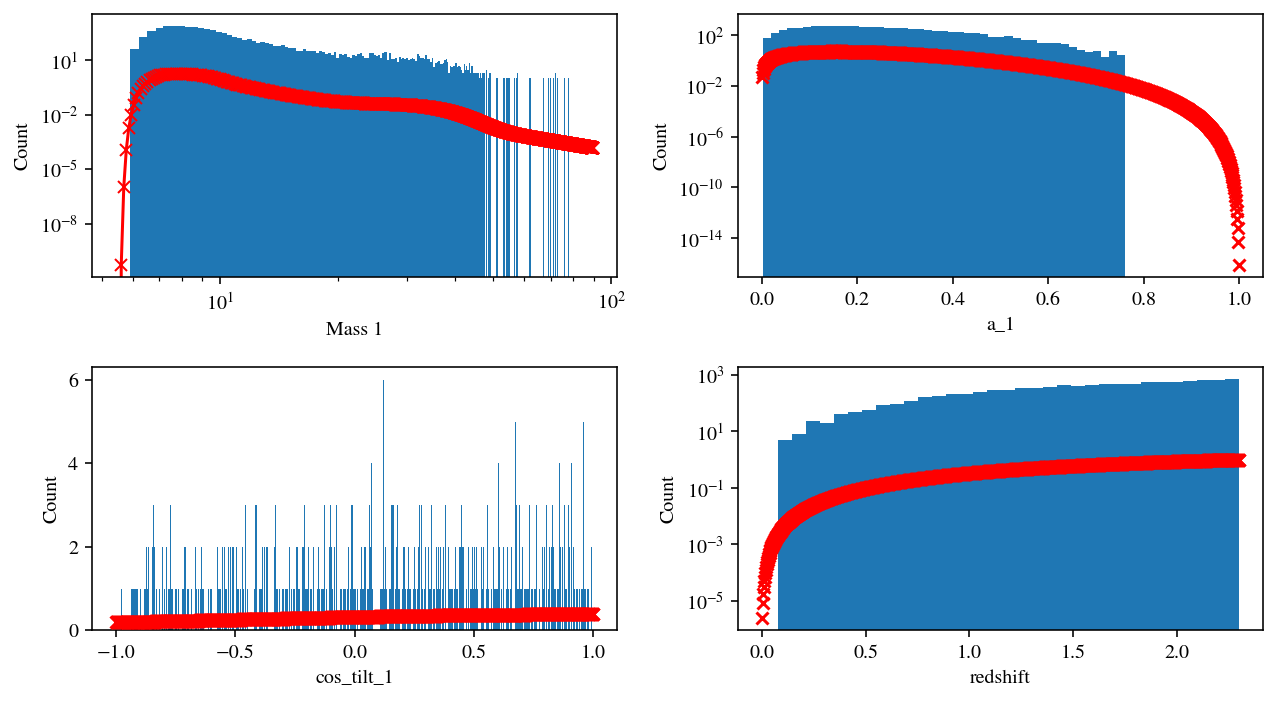

In [13]:
# generate some random number between 0 and 1
uniform_vals = np.random.uniform(0,1,10000)

# interpolate to create a function that maps from the y axis of the cdf to the corresponding x value and feed this the uniform_vals
mass_samp = np.interp(uniform_vals, PP_mass_cdf, mass_1)
a1_samp = np.interp(uniform_vals, PP_mag_cdf, a_1)
cos1_samp = np.interp(uniform_vals, PP_ori_cdf, cos_tilt_1)
z_samp = np.interp(uniform_vals, PP_z_cdf, redshift)

fig = plt.figure(figsize=(9,5))

fig.add_subplot(2,2,1, xlabel='Mass 1', ylabel='Count')
plt.hist(mass_samp, bins='auto')
plt.loglog(mass_1, mass_probs, marker='x', color='red')
plt.yscale('log')
plt.xscale('log')

fig.add_subplot(2,2,2, xlabel='a_1', ylabel='Count')
plt.scatter(a_1, spin_mag_probs, marker='x', color='red', zorder=10)
plt.hist(a1_samp, bins='auto')
plt.yscale('log')

fig.add_subplot(2,2,3, xlabel='cos_tilt_1', ylabel='Count')
plt.hist(cos1_samp, bins=10000)
plt.scatter(cos_tilt_1, spin_ori_probs, marker='x', color='red', zorder=10)

fig.add_subplot(2,2,4, xlabel='redshift', ylabel='Count')
plt.hist(z_samp, bins='auto')
plt.scatter(redshift, z_probs, marker='x', color='red', zorder=10)
plt.yscale('log')

fig.tight_layout()
plt.show()

So this looks like the initial distribution, sampled.

See: https://stackoverflow.com/questions/56017163/given-a-2d-numpy-array-representing-a-2d-distribution-how-to-sample-data-from-t/64614309#64614309 for a way to do this over multiple parameters rather than just mass.

* I need to be careful though, are there values of certain parameters that can't co-exist?

Overpolot originals
* I've opverploted the prob dists so the scale is wrong but otherwise the shape is the same

## Recap

So what have I got here then?

* mass_samp is a bunch of masses sampled from the SinglePeakSmoothedMassDistribution model. Similarly I have sampled chi_effs.

I want:
* Mass_1, Mass_2, Spin_1, Spin_2...

So I need to:
* also sample q, to get mass_2
* convert chi_eff to spins???

## Next
* Go back and change q from being all 1's so be random, but within the bounds of mmin and see what this does to my distribution
    * If it hasn't broken, then I should be able to sample q as well as Mass_1
    * Although there seems to be a preference for equal mass ratios https://ui.adsabs.harvard.edu/abs/2020ApJ...891L..27F/abstract 
* I need to sample from all distributions at the same time to get one set of posterior parameters
    * Gibbs Sampling...

## Gibbs sampling
https://www.youtube.com/watch?v=a_08GKWHFWo

https://en.wikipedia.org/wiki/Gibbs_sampling

The outputs from the model.prob are jointly conditioned on mass and mass ratio for example. So I need to sample from a higher order parameter space, sampling both mass_1 and q simultaneously.

Will I need to sample from the outputs of the 4 models simultaneously?
* Yes

If the first point is arbitrarily selected, I should discard samples from the burn in period. Then I should be able to avoid these correlations if I take one posterior sample from each of many hyperposterior samples.
* not necessary in this case as we have the distribution, we know where m1 must lie

### Mass Model Application

The mass model produces a probability from the hyperposteriors and a value for mass_1 and mass_ratio. So this probability is $p(m_{1}, q)$:

mass_model output = $p(m_{1}, q)$

Gibbs sampling then requires I be able to sample from $p(m_{1} | q)$ and then $p(q | m_{1})$.

* Start with an initial ($m^{0}_{1}, q^{0}$)
* then sample $p(m^{1}_{1}) \sim p(m^{1}_{1} | q^{0})$
* then sample $p(q^{1}) \sim p(q^{1} | m^{1}_{1})$

If $m_{1}, q$ are independent then $p(m_{1} | q) = p(m_{1})$.

In the current state of my work, I have set $q=1$ so what I actually have from the model is $p(m_{1}|q=1)$.

The primary model for `SinglePeakSmoothedMassDistribution` is the `two_component_single`, 

$p(m) = (1 - \lambda_{m}) p_{\text{pow}} + \lambda_{m} p_{\text{norm}}$

$p_{\text{pow}}(m) \propto m^{-\alpha} : m_{\min} \leq m < m_{\max}$

$p_{\text{norm}}(m) \propto \exp\left(-\frac{(m - \mu_{m})^2}{2\sigma^2_{m}}\right)$

This is then coded up as,

    p_pow = powerlaw(mass, alpha=-alpha, high=mmax, low=mmin)
    p_norm = truncnorm(mass, mu=mpp, sigma=sigpp, high=gaussian_mass_maximum, low=mmin)
    prob = (1 - lam) * p_pow + lam * p_norm
    
for which the `powerlaw`(xx, alpha, high, low) is:

$p(x) = \frac{1 + \alpha}{x_{\max}^{1 + \alpha} - x_{\min}^{1 + \alpha}} x^{\alpha}$

and `truncnorm` is,

$p(x) = \sqrt{\frac{2}{\pi\sigma^2}}\left[\text{erf}\left(\frac{x_{max} - \mu}{\sqrt{2}}\right) + \text{erf}\left(\frac{\mu - x_{min}}{\sqrt{2}}\right)\right]^{-1}\exp\left(-\frac{(\mu - x)^2}{2 \sigma^2}\right)$
        
`SinglePeakSmoothedMassDistribution` is a class object that takes `BaseSmoothedMassDistribution` as it's input. Calling this class returns the probability p_m1 * p_q.

p_m1 = primary_model(dataset["mass_1"], kwargs)

p_q = powerlaw(dataset["mass_ratio"], alpha=beta, high=1, low = mmin / dataset["mass_1"])



The mass ratio is conditioned on mass in that you cannot have a mass ratio so low (say 0.01) such that mass_2 will be below the minimum allowed BH mass.

So p_q is calculated as a powerlaw, then the **smoothing** is applied. From wiki:

---

The so-called "Planck-taper" window is a bump function that has been widely used in the theory of partitions of unity in manifolds. It is smooth (a C ∞ function) everywhere, but is exactly zero outside of a compact region, exactly one over an interval within that region, and varies smoothly and monotonically between those limits. Its use as a window function in signal processing was first suggested in the context of gravitational-wave astronomy, inspired by the Planck distribution.

---

$S = (f(m - mmin, delta_m) + 1)^{-1}$

$f(m') = delta_m / m' + delta_m / (m' - delta_m)$

delta_m is the range of mass tapering on the lower end of the mass distribution.

After this smoothing is applied, we do p_q/norm_p_q.

norm_p_q is obtained by again calculating p_q as by a powerlaw, and is again smoothed but with a difference.
* the smoothing for p_q is using the dataset m1s and qs
* the smoothing for norm_p_q used the self.m1s and qs, which are linspaced on mmin mmax and 0,1

then norms = trapz(p_q, self.qs, axis=0)

---

the trapezoidal rule is a technique for approximating the definite integral. 

---

all_norms = (norms[self.n_below] * (1 - self.step) + norms[self.n_above] * self.step)

### Questions
If the output probability is $p(m_{1}) \times p(q)$ then can I take my first value of q...

What is p(q|m)?

Go from p(q) to q via Inverse transofrm sampling, interp1d, CDF

The following is a good tutorial:

https://kieranrcampbell.github.io/blog/2016/05/15/gibbs-sampling-bayesian-linear-regression.html

In [14]:
# start by defining an m and a q which are within the allowed range
mass_1_0 = np.random.uniform(PP_params['mmin'],PP_params['mmax'],1)
q_0 = np.random.uniform(0,1,1)
while mass_1_0 * q_0 < PP_params['mmin']:
    q_0 = np.random.uniform(0,1,1)

sample_df = pd.DataFrame(mass_1_0, columns = ['mass_1'])
sample_df = sample_df.assign(mass_ratio = q_0)

# so we first take our value of m and calculate q | m
p_q = gwpop.utils.powerlaw(sample_df['mass_ratio'], PP_params['beta'], 1, 
                           PP_params['mmin'] / sample_df["mass_1"])

# 

print(p_q)
print(sample_df)
# this isn't the normalised version

0    2.372888
Name: mass_ratio, dtype: float64

,mass_1,mass_ratio
0,29.30098,0.849931


* Take 1000 m1s, linspace
    * All at q=1
* Produce 1000 p_m1s
* populate cdf
* sample cdf with rand[0,1]
* get an m1
* produce 1000 q's for this m1
* get p_qs
* populate cdf for q
* sample with rand[0,1]
* get a q
* now I have my first sampled m1, q
* with this q, get 1000m1s...

I can't call the model.prob as it gives me the combined probability, I need to draw out p_m1 and p_q from within the model.

In [15]:
base = gwpop.models.mass.SinglePeakSmoothedMassDistribution(mmin = PP_params['mmin'],
                                                     mmax = PP_params['mmax'])
base.parameters = PP_params
nsamps = 1000
m1_sample = np.zeros(nsamps)
q_sample = np.zeros(nsamps)

# first get an initial point to loop from, call our initial point m1=30, q=1. Use this q=1 for p(m|q)
m1_sample[0] = 30
q_sample[0] = 1

# difference in time is 55s for 200 fill_samps or 65s for 5000 fill_samps
# these fill_samps are there to fill the space for the cdf
fill_samps = 5000

for i in range(1,nsamps):
    # do I need to define an mmin based on q? I don't think so because the new q will sort this
    # fill the parameter space to create a pdf
    m1s = np.linspace(PP_params['mmin'],PP_params['mmax'],fill_samps)
    # the above is being called each loop but could be taken outside the loop as it isn't q dependent
    qs_1 = np.full(fill_samps, q_sample[i-1])
    space_df_m = pd.DataFrame(m1s, columns = ['mass_1'])
    space_df_m = space_df_m.assign(mass_ratio = qs_1)
    # obtain the pdf
    p_m1s = base.p_m1(space_df_m, alpha = PP_params['alpha'], 
              mmin = PP_params['mmin'], 
              mmax = PP_params['mmax'], 
              lam = PP_params['lam'], 
              mpp = PP_params['mpp'], 
              sigpp = PP_params['sigpp'])
    # create and normalise the cdf
    m1s_cdf = np.cumsum(p_m1s).to_numpy()
    m1s_cdf = (m1s_cdf - m1s_cdf[0])
    m1s_cdf /= m1s_cdf[-1]
    # now we take a sample from the cdf
    m1_sample[i] = np.interp(np.random.random(), m1s_cdf, m1s)
    
    # define a minimum q , based on our mass sample
    q_min = PP_params['mmin']/m1_sample[0]
    qs = np.linspace(q_min,1,fill_samps)
    m1s_new = np.full(fill_samps, m1_sample[i])

    space_df_q = pd.DataFrame(m1s_new, columns = ['mass_1'])
    space_df_q = space_df_q.assign(mass_ratio = qs)

    p_qs = base.p_q(space_df_q, PP_params['beta'], PP_params['mmin'], PP_params['delta_m'])

    qs_cdf = np.cumsum(p_qs)
    qs_cdf = (qs_cdf - qs_cdf[0])
    qs_cdf /= qs_cdf[-1]

    q_sample[i] = np.interp(np.random.random(), qs_cdf, qs)

# keep only the samples obtained from the Gibbs method, excluding the starter
samples = pd.DataFrame(m1_sample[1:], columns = ['mass_1'])
samples = samples.assign(mass_ratio = q_sample[1:])

print(samples)

/data/wiay/johnny/phd1/phd1/lib/python3.7/site-packages/gwpopulation/models/mass.py:554: RuntimeWarning: overflow encountered in exp
  window[smoothing_region] = 1 / (xp.exp(exponent) + 1)
/data/wiay/johnny/phd1/phd1/lib/python3.7/site-packages/gwpopulation/utils.py:76: RuntimeWarning: divide by zero encountered in true_divide
  norm = (1 + alpha) / (high ** (1 + alpha) - low ** (1 + alpha))
/data/wiay/johnny/phd1/phd1/lib/python3.7/site-packages/gwpopulation/utils.py:79: RuntimeWarning: invalid value encountered in multiply
  prob *= (xx <= high) & (xx >= low)
/data/wiay/johnny/phd1/phd1/lib/python3.7/site-packages/gwpopulation/models/mass.py:552: RuntimeWarning: divide by zero encountered in true_divide
  delta_m / shifted_mass + delta_m / (shifted_mass - delta_m)
/data/wiay/johnny/phd1/phd1/lib/python3.7/site-packages/gwpopulation/models/mass.py:503: RuntimeWarning: invalid value encountered in multiply
  self.m1s_grid * self.qs_grid, mmin=mmin, mmax=self.m1s_grid, delta_m=delta_m
/

,mass_1,mass_ratio
0,5.984378,0.991302
1,8.150570,0.979168
2,6.254414,0.994272
3,20.075455,0.764246
4,35.194217,0.852190
...,...,...
994,9.434551,0.990434
995,5.678651,0.995907
996,11.774659,0.655020
997,5.842534,0.998657


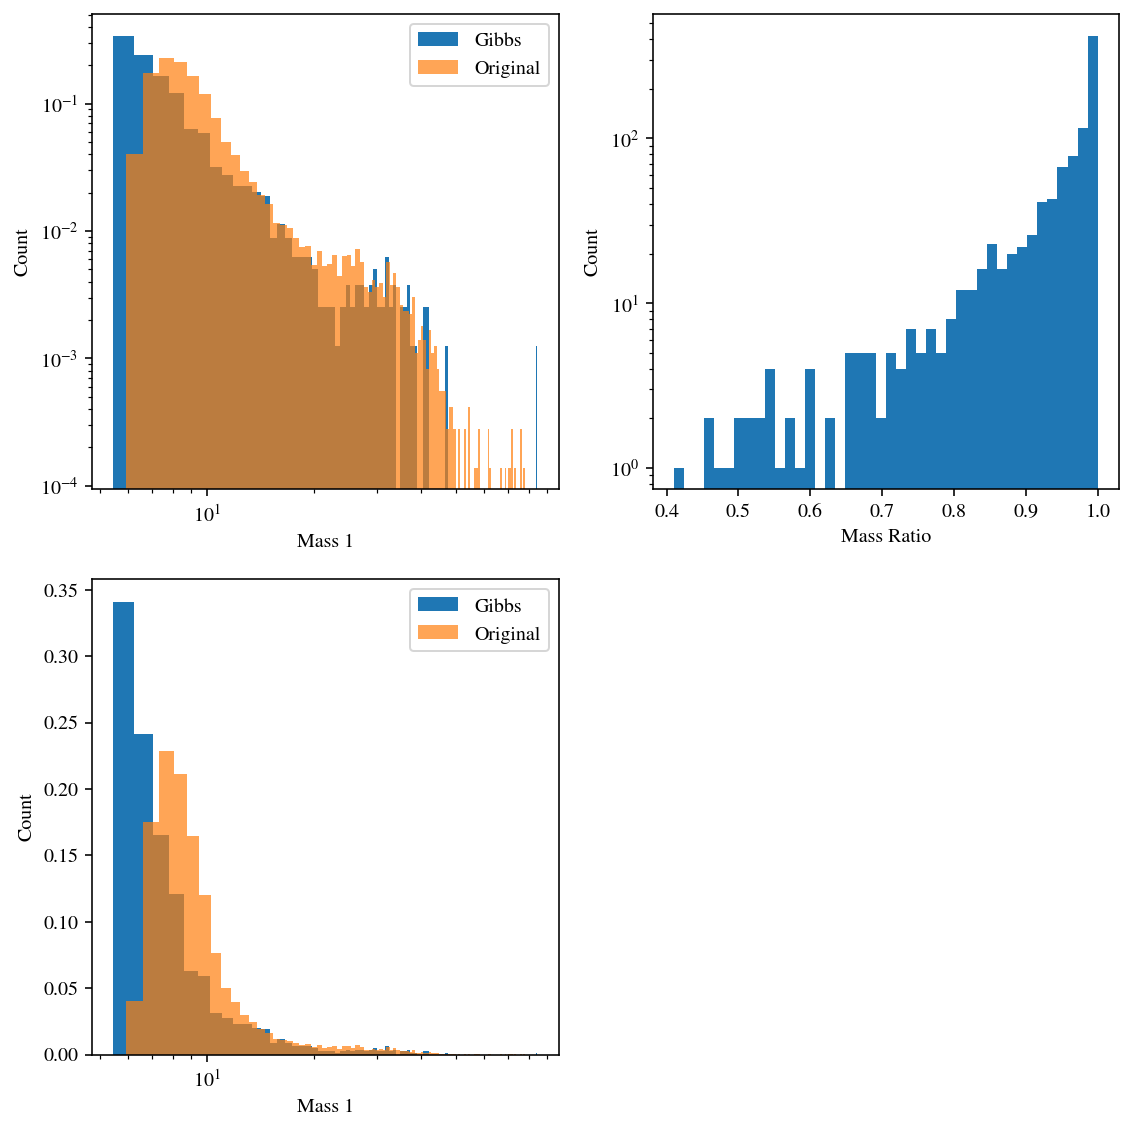

In [16]:
fig = plt.figure(figsize=(8,8))

fig.add_subplot(2,2,1, xlabel='Mass 1', ylabel='Count')
plt.hist(samples['mass_1'], bins=100, label='Gibbs', density=1)
plt.hist(mass_samp[1:], bins=100, label = 'Original', alpha=0.7, density=1)
plt.yscale('log')
plt.xscale('log')
plt.legend()

fig.add_subplot(2,2,3, xlabel='Mass 1', ylabel='Count')
plt.hist(samples['mass_1'], bins=100, label='Gibbs', density=1)
plt.hist(mass_samp[1:], bins=100, label = 'Original', alpha=0.7, density=1)
plt.xscale('log')
plt.legend()

fig.add_subplot(2,2,2, xlabel='Mass Ratio', ylabel='Count')
plt.hist(samples['mass_ratio'], bins='auto')
plt.yscale('log')


fig.tight_layout()
plt.savefig('gibbs_10000_samps_mass.png', dpi = 100)
plt.show()

This looks like it's close to working. It does produce the odd q = nan so maybe something not quite right about the limits.
* this looks solved

Next I need to work this into a loop. Start with the samples data frame and set the first row to something like 30, 1. Then take 1000 1's and the full range of M1s. Do the sampling as about and update row 2 of the samples df with the new M1. Take 1000 of this new M1 and get conditioned qs...
* appears to be working

### Differences
* The oringal plot is all at q=1
    * does this lead to higher density of masses in the first bin for the original?
        * choice of mass_1 in gibbs approach was independent of q
* gibbs is 9999 samples vs 10000 in original

### Speed
It is quite slow, takes around a minute to run just for the mass application above. I think this might be due to the use of the GWPopulation models vs those in the likes of scipy. Although the GWPopulation models include **smoothing**.

### Qu

What is quicker, updating the df in each loop of i, or building an array of M1s and qs and creating a df of them at the end?

It is currently taking about 1 min to get 1000 samples by this method.

When the mass ratio is high, say >0.7, then p_q > 1. This base.p_q should be the normalised version.

Why is this?

I could go and just use an equivalent distributiuon in scipy BUT I'd like to understand what's going on here

## Next
**Trace plots**. Here are some notes that include trace plots https://myweb.uiowa.edu/pbreheny/uk/teaching/701/notes.html I need a better description though.

I have a range of allowed M1s so how do you define convergence to the posterior?

* Y axis: the parameter?
    * what parameter? 
        * mass or something like that doesn't make much sense to me since its the distribution
        * so something like alpha which describes the power law
        * then another parameter describing the gaussian peak, like lambda
        * perhaps I could just do $\alpha \times \lambda$ or something like that so I need only look at one plot?
            * not too handy for debugging if it doesn't work
* X axis: the sample number?

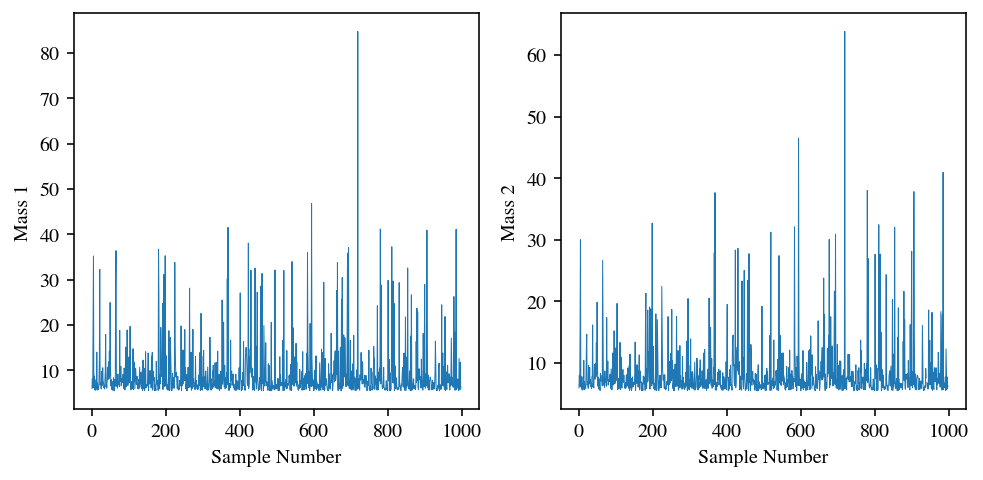

In [17]:
fig = plt.figure(figsize=(8,8))

fig.add_subplot(2,2,1, xlabel='Sample Number', ylabel='Mass 1')
plt.plot(samples['mass_1'], lw=0.5)

fig.add_subplot(2,2,2, xlabel='Sample Number', ylabel='Mass 2')
plt.plot(samples['mass_1']*samples['mass_ratio'], lw=0.5)

### Multi-model Application

* I will need to combine the probability outputs of the models to get $p(m_{1}, q, a1, a2, \cos(\theta_1), \cos(\theta_2), z)$
* I will need to construct something like $p(m_{1}|q, \chi_{eff}, \cos(\theta_1), \cos(\theta_2), z)$ for each parameter conditional on the others

Simple if independent

trace plots will show if burn in

List each of the formulae for spins and z to be clear on their dependencies:

**Spins a1 and a2**

iid_spin_magnitude_beta uses independent_spin_magnitude_beta which is:

beta_dist(dataset["a_1"], alpha_chi_1, beta_chi_1, scale=amax_1) * beta_dist(dataset["a_2"], alpha_chi_2, beta_chi_2, scale=amax_2)

so each of these beta_dist's are:

$p(x) = \frac{x^{\alpha - 1} (x_{max} - x)^{\beta - 1}}{B(\alpha, \beta) x_{max}^{\alpha + \beta + 1}}$

these have no dependencies on mass or other spins or z.

BUT this returns beta_dist(a1) $\times$ beta_dist(a2)

**Spin orientation**

iid_spin_orientation_gaussian_isotropic depends on independent_spin_orientation_gaussian_isotropic which is:

$p(z_1, z_2 | \xi, \sigma_1, \sigma_2) = \frac{(1 - \xi)^2}{4} + \xi \prod_{i\in\{1, 2\}} \mathcal{N}(z_i; \mu=1, \sigma=\sigma_i, z_{min}=-1, z_{max}=1)$

Where $\mathcal{N}$ is the truncated normal distribution. z1,2 = cos(theta_1,2)

Note: $\xi$ is the fraction of binaries that evolved in the field and $1-\xi$ the fraction dynamically formed.

So in this equation, the first term is the dynamic-only distribution.

Issue: the above equation is coded as (1 - xi_spin) / 4 rather than (1 - xi_spin)^2 / 4. In the paper https://arxiv.org/pdf/1704.08370.pdf (eq. 4) the squared is not present. The first term is (1 - xi)p0 with p0=1/4.
* Not an issue

The spin orientation has no dependencies on other parameters.

BUT this also return the product of both trunc norms

    prior = (1 - xi_spin) / 4 + xi_spin * truncnorm(
        dataset["cos_tilt_1"], 1, sigma_1, 1, -1
    ) * truncnorm(dataset["cos_tilt_2"], 1, sigma_2, 1, -1)

and is made trickier by the addition of the first term for the total probability. Am I able to split this first term evenly and have:

$p(z_1 | \xi, \sigma_1, \sigma_2) = \frac{(1 - \xi)}{2} + \xi \mathcal{N}(z_1; \mu=1, \sigma=\sigma_1, z_{min}=-1, z_{max}=1)$

**NO** this wouldn't account properly for the constant term.

Do I need to split the spin orientation into cos_1 and cos_2 if I am later going to combine them again to get chi_eff and chi_p?
* Yes the equations for chi_eff and chi_p use the individual parameters

I can start by ignoring the field vs dynamical and just compute the truncnorm for each, then I **need to take another look at this and update**.

As suggested by CB, I can determine the channel by a random number, then sample as appropriate.

**Redshift**

PowerLawRedshift is dfined as follows:

$p(z|\gamma, \kappa, z_p) \propto \frac{1}{1 + z}\frac{dV_c}{dz} \psi(z|\gamma, \kappa, z_p)$

$\psi(z|\gamma, \kappa, z_p) = (1 + z)^\lambda$

with the differential spacetime volume:

$d\mathcal{V} = \frac{1}{1+z} \frac{dVc}{dz} \psi(z|\Lambda)$

$\gamma$ is the slope of the distribution at low redshift, $\kappa$ is the slope at high redshift, $z_{p}$ is the redshift at which the distribution peaks.

I don't see any dependency on other parameters.

So in conclusion, these parameters can be sampled independently and the only parameters that really requires Gibbs are the Masses.

Putting all the sampling together...

(later think about turning this into a function)

In [18]:
def cdf_samp(pdf, param):
    # create and normalise the cdf
    if isinstance(pdf, pd.Series) == True:
        pdf = pdf.to_numpy()
    cdf = np.cumsum(pdf)
    cdf = (cdf - cdf[0])
    cdf /= cdf[-1]
    # now we take a sample from the cdf
    samp = np.interp(np.random.random(), cdf, param)
    return samp

In [19]:
base_mass = gwpop.models.mass.SinglePeakSmoothedMassDistribution(mmin = PP_params['mmin'],
                                                     mmax = PP_params['mmax'])
base_spin_mag = gwpop.models.spin.iid_spin_magnitude_beta
base_spin_ori = gwpop.models.spin.iid_spin_orientation_gaussian_isotropic
# can treat the redshift model a little differently, it is a class and the functions within don't need split out
z_model = Model([gwpop.models.redshift.PowerLawRedshift(z_max = PP_params['z_max'])])

base_mass.parameters = base_spin_mag.parameters  = base_spin_ori.parameters = z_model.parameters = PP_params

nsamps = 1000
m1_sample = np.zeros(nsamps)
q_sample = np.zeros(nsamps)
a_1_sample = np.zeros(nsamps)
a_2_sample = np.zeros(nsamps)
cos_tilt_1_sample = np.zeros(nsamps)
cos_tilt_2_sample = np.zeros(nsamps)
redshift_sample = np.zeros(nsamps)

# first get an initial point to loop from, call our initial point m1=30, q=1. Use this q=1 for p(m|q)
m1_sample[0] = 30
q_sample[0] = 1
# I don't actually need to define these as they don't have dependencies
a_1_sample[0] = 0.5
a_2_sample[0] = 0.5
cos_tilt_1_sample[0] = 0
cos_tilt_2_sample[0] = 0
redshift_sample[0] = 1

# difference in time is 55s for 200 fill_samps or 65s for 5000 fill_samps
# these fill_samps are there to fill the space for the cdf
fill_samps = 5000
m1s = np.linspace(PP_params['mmin']+0.01,PP_params['mmax'],fill_samps)
a = np.linspace(0,1,fill_samps)
cos_tilt = np.linspace(-1,1,fill_samps)
redsh = np.linspace(0,2.3,fill_samps)

for i in range(1,nsamps):
    # do I need to define an mmin based on q? I don't think so because the new q will sort this
    # fill the parameter space to create a pdf

    # build a dataframe to fill the pdf space
    qs_1 = np.full(fill_samps, q_sample[i-1])
    space_df = pd.DataFrame(m1s, columns = ['mass_1'])
    space_df = space_df.assign(mass_ratio = qs_1,
                              a_1 = a,
                              a_2 = a,
                              cos_tilt_1 = cos_tilt,
                              cos_tilt_2 = cos_tilt,
                              redshift = redsh)
    # obtain the pdf
    p_m1s = base_mass.p_m1(space_df, alpha = PP_params['alpha'], 
              mmin = PP_params['mmin'], 
              mmax = PP_params['mmax'], 
              lam = PP_params['lam'], 
              mpp = PP_params['mpp'], 
              sigpp = PP_params['sigpp'])
    # sample randomly from the cdf
    m1_sample[i] = cdf_samp(p_m1s, m1s)
    
    # define a minimum q , based on our mass sample
    q_min = PP_params['mmin']/m1_sample[i]
    qs = np.linspace(q_min,1,fill_samps)
    m1s_new = np.full(fill_samps, m1_sample[i])

    space_df_q = pd.DataFrame(m1s_new, columns = ['mass_1'])
    space_df_q = space_df_q.assign(mass_ratio = qs)

    p_qs = base_mass.p_q(space_df_q, PP_params['beta'], PP_params['mmin'], PP_params['delta_m'])

    q_sample[i] = cdf_samp(p_qs, qs)

    #now for spin mag
    p_a1s = gwpop.utils.beta_dist(space_df["a_2"], PP_params['alpha_chi'], PP_params['beta_chi'], scale=np.max(a))
    a_1_sample[i] = cdf_samp(p_a1s, a)

    p_a2s = gwpop.utils.beta_dist(space_df["a_2"], PP_params['alpha_chi'], PP_params['beta_chi'], scale=np.max(a))
    a_2_sample[i] = cdf_samp(p_a2s, a)

    # and the spin ori, this is currently ignoring the effect of the xi term for mixing field and dynamical

    # choose a random number between 0 and 1 and compare this to the value of xi_spin
    # check which channel is determined by above or below xi_spin, if less then procees by field channel
    channel = np.random.random()
    if channel < PP_params['xi_spin']:

      p_cos1s = gwpop.utils.truncnorm(space_df["cos_tilt_1"], 1, PP_params['sigma_spin'], 1, -1)
      cos_tilt_1_sample[i] = cdf_samp(p_cos1s, cos_tilt)

      p_cos2s = gwpop.utils.truncnorm(space_df["cos_tilt_2"], 1, PP_params['sigma_spin'], 1, -1)
      cos_tilt_2_sample[i] = cdf_samp(p_cos2s, cos_tilt)
    # if greater, proceed by dynamic channel
    else:
      p_cos1s = np.full(fill_samps, 0.25)
      cos_tilt_1_sample[i] = cdf_samp(p_cos1s, cos_tilt)

      p_cos2s = np.full(fill_samps, 0.25)
      cos_tilt_2_sample[i] = cdf_samp(p_cos2s, cos_tilt)

    # finally, the redhift
    p_zs = z_model.prob(space_df)
    redshift_sample[i] = cdf_samp(p_zs, redsh)


# keep only the samples obtained from the Gibbs method, excluding the starter
samples = pd.DataFrame(m1_sample[1:], columns = ['mass_1'])
samples = samples.assign(mass_ratio = q_sample[1:],
                                a_1 = a_1_sample[1:],
                              a_2 = a_2_sample[1:],
                              cos_tilt_1 = cos_tilt_1_sample[1:],
                              cos_tilt_2 = cos_tilt_2_sample[1:],
                              redshift = redshift_sample[1:])

print(samples)

# have a check to see if there are any NaNs in the sampled dataframe, True if there are
samples.isnull().values.any()

/data/wiay/johnny/phd1/phd1/lib/python3.7/site-packages/gwpopulation/models/mass.py:554: RuntimeWarning: overflow encountered in exp
  window[smoothing_region] = 1 / (xp.exp(exponent) + 1)
/data/wiay/johnny/phd1/phd1/lib/python3.7/site-packages/gwpopulation/utils.py:76: RuntimeWarning: divide by zero encountered in true_divide
  norm = (1 + alpha) / (high ** (1 + alpha) - low ** (1 + alpha))
/data/wiay/johnny/phd1/phd1/lib/python3.7/site-packages/gwpopulation/utils.py:79: RuntimeWarning: invalid value encountered in multiply
  prob *= (xx <= high) & (xx >= low)
/data/wiay/johnny/phd1/phd1/lib/python3.7/site-packages/gwpopulation/models/mass.py:552: RuntimeWarning: divide by zero encountered in true_divide
  delta_m / shifted_mass + delta_m / (shifted_mass - delta_m)
/data/wiay/johnny/phd1/phd1/lib/python3.7/site-packages/gwpopulation/models/mass.py:503: RuntimeWarning: invalid value encountered in multiply
  self.m1s_grid * self.qs_grid, mmin=mmin, mmax=self.m1s_grid, delta_m=delta_m
/

,mass_1,mass_ratio,a_1,a_2,cos_tilt_1,cos_tilt_2,redshift
0,22.056523,0.767754,0.751024,0.142014,0.286826,-0.515417,2.070143
1,5.805150,0.993436,0.099410,0.091699,0.829104,0.882716,0.825910
2,7.263957,0.900571,0.125792,0.065968,0.622391,0.478437,1.509814
3,7.257986,0.948814,0.621568,0.153819,-0.847138,0.650109,1.689336
4,5.902655,0.996058,0.127403,0.156745,0.943029,-0.263742,0.602257
...,...,...,...,...,...,...,...
994,30.658075,0.491933,0.234713,0.243600,-0.975409,-0.847887,1.612085
995,6.558153,0.938410,0.049162,0.087783,0.640301,0.844103,1.632896
996,5.708825,0.999993,0.101983,0.244539,-0.535588,-0.898019,1.983104
997,11.026279,0.975759,0.233074,0.122636,0.628326,-0.360758,1.627025


False

I get NaN in mass ratio when mass_1 is less than 0.01 away from mmin, so any mass_ratio greater than 0.999 becomes a NaN. 
* Solving this by setting the mmin range to be mmin+0.01.

### Converting to the parameters for the SNRs

Refer to https://arxiv.org/pdf/1704.08370.pdf , I may need chi_effs and chi_ps.

Equation 1 from this paper:

$\chi_{eff} = \frac{a_{1}\cos{\theta_{1}} + q a_{2} \cos{\theta_{2}}}{1+q}$

$\chi_{p} = max(a_{1}\sin{\theta_{1}}, \frac{4q + 3}{4+3q}qa_{2}\sin{\theta_2})$

`IMRPHENOMP` uses chi_eff and chi_p.

**Check** if the parameters that I have are in the detector frame or not. $M_{det} = M_{source} \times (1+z)$



In [20]:
# create functions for these equations
def chi_eff(a1, a2, cos_theta1, cos_theta2, q):
    chi = (a1*cos_theta1 + q*a2*cos_theta2)/(1+q)
    return chi

def chi_p(a1, a2, sin_theta1, sin_theta2, q):
    chi = np.maximum(a1*sin_theta1, (4*q+3)*q*a2*sin_theta2/(4+3*q))
    return chi

In [21]:
samples

,mass_1,mass_ratio,a_1,a_2,cos_tilt_1,cos_tilt_2,redshift
0,22.056523,0.767754,0.751024,0.142014,0.286826,-0.515417,2.070143
1,5.805150,0.993436,0.099410,0.091699,0.829104,0.882716,0.825910
2,7.263957,0.900571,0.125792,0.065968,0.622391,0.478437,1.509814
3,7.257986,0.948814,0.621568,0.153819,-0.847138,0.650109,1.689336
4,5.902655,0.996058,0.127403,0.156745,0.943029,-0.263742,0.602257
...,...,...,...,...,...,...,...
994,30.658075,0.491933,0.234713,0.243600,-0.975409,-0.847887,1.612085
995,6.558153,0.938410,0.049162,0.087783,0.640301,0.844103,1.632896
996,5.708825,0.999993,0.101983,0.244539,-0.535588,-0.898019,1.983104
997,11.026279,0.975759,0.233074,0.122636,0.628326,-0.360758,1.627025


In [22]:
samples = samples.assign(chi_eff = chi_eff(samples['a_1'], samples['a_2'],samples['cos_tilt_1'],samples['cos_tilt_2'],samples['mass_ratio']))
samples = samples.assign(tilt_1 = np.arccos(samples['cos_tilt_1']))
samples = samples.assign(tilt_2 = np.arccos(samples['cos_tilt_2']))
samples = samples.assign(sin_tilt_1 = np.sin(samples['tilt_1']))
samples = samples.assign(sin_tilt_2 = np.sin(samples['tilt_2']))
samples = samples.assign(chi_p = chi_p(samples['a_1'], samples['a_2'],samples['sin_tilt_1'],samples['sin_tilt_2'],samples['mass_ratio']))
samples = samples.assign(spin1z = samples['a_1']*samples['cos_tilt_1'])
samples = samples.assign(spin2z = samples['a_2']*samples['cos_tilt_2'])
samples = samples.assign(spin1x = samples['a_1']*samples['sin_tilt_1'])
samples = samples.assign(spin2x = samples['a_2']*samples['sin_tilt_2'])

# # create a new df for the parameters we want and save it to use in another ipynb
# output_df = pd.DataFrame(samples['mass_1'], columns = ['mass_1'])
# output_df = output_df.assign(mass_2 = samples['mass_1']*samples['mass_ratio'],
# chi_eff = samples['chi_eff'], chi_p = samples['chi_p'], redshift = samples['redshift'])

samples.to_csv('params_for_SNR.csv')

### Parallelizing

Take 1000 first samples at the same time rather than 1000 after each other.

#### The below is a very brief attempt to recreate the samples PP_hyperposterior_samples found at the beginning.

Need to get some posteriors from the latest data release. So first download the GWTC-3 events then use the below to form the posteriors.

Hyper-posteriors vs posteriors:
* To calculate SNRs I will need posterior samples
* I have hyper-posterior samples

Is there a way to draw posterior samples from a population model, which is defined by hyper-parameters?

The O3bPEDataReleaseNotebook draws posterior samples from GW events. It states the following:

---

The `data.labels` list contains the labels for the different analysis configurations used for this event. For GW200224_222234 these are:
- C01:IMRPhenomXPHM: Samples produced using the [`IMRPhenomXPHM` waveform](https://arxiv.org/abs/2004.06503), a phenomenological waveform including precession and higher modes
- C01:SEOBNRv4PHM: Samples produced using the [`SEOBNRv4PHM` waveform](https://arxiv.org/abs/2004.09442), an effective one-body waveform including precession and higher modes
- C01:Mixed: A mixed set of samples created by combining both waveforms into one set

`C01` refers to the data quality level that the parameter estimation runs were performed on. `C01` is data that has gone through a detailed process of cleaning and conditioning.

When choosing a set of samples to use the choice of waveform should be considered carefully. `SEOB` waveforms such as `SEOBNRv4PHM` are quite slow to generate. As such `GW200224_222234` only has 5978 samples for this waveform. The `Phenom` model is faster to generate so the `IMRPhenomXPHM` has 88200 samples. However, `Phenom` models are generated in the frequency domain and may demonstrate some waveform systematics in the frequency domain. If waveform systematics are not relevant for your work it may be best to rely upon the larger number of `IMRPhenomXPHM` samples. This will be the case for the vast majority of events in the GWTC-3 Catalog.

---

So there are of the order 1000s of samples from one event. This doesn't sound like what I'm looking for, I want samples drawn from the entire population. 
* So does that mean I get a few samples for every detected event? That wouldn't seem right, it should be possible to draw samples from the population model.

In [23]:
#!wget https://dcc.ligo.org/public/0157/P1800370/002/GWTC-1_sample_release.tar.gz
#!tar -xvzf GWTC-1_sample_release.tar.gz

In [24]:
# from gwosc.datasets import find_datasets
# events = find_datasets(type='event', match="GW")
# print("Some available events are:")
# print(events)

The below 